# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

import random
import time
import torch

import matplotlib.pyplot as plt
%matplotlib inline

from collections import deque
from ddpg_agent import Agent
from unityagents import UnityEnvironment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='/home/tktk/deep-reinforcement-learning/p2_continuous-control/Reacher_Linux/Reacher.x86')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
# env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:

# def ddpg(agent,n_episodes=2000, max_t=1000, last_episode_number=1):

#     scores_window = deque(maxlen=100)
#     scores = []
#     total_time_elapsed = 0
#     for i_episode in range(last_episode_number, n_episodes+1):
#         begin = time.time()
#         score_avg = 0
#         env_info = env.reset(train_mode=True)[brain_name]      # reset the environment
# #         print('Reset environment...')
#         states = env_info.vector_observations                  # get the current state (for each agent)
#         scores_temp = np.zeros(num_agents)                        # initialize the score (for each agent)
#         agent.reset()
#         score = 0
#         for t_step in range(max_t):
#             actions = agent.act(states)     
#             env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#             next_states = env_info.vector_observations         # get next state (for each agent)
#             rewards = env_info.rewards                         # get reward (for each agent)
#             dones = env_info.local_done                        # see if episode finished   
#             agent.step(states, actions, rewards, next_states, dones, t_step)
#             states = next_states
#             scores_temp += rewards
#             if np.any(dones):
#                 break
        
#         score = np.mean(scores_temp)
#         scores_window.append(score)
#         score_avg = np.mean(scores_window)
#         scores.append(score)        
        
#         end = time.time()
#         diff = end - begin
#         print("\rEpisode {:}\t Average Score {:.2f}\tMax Score {:.2f}\tTime {:.2f} s".format(i_episode, score_avg, scores_temp.max(), diff), end="")
#         total_time_elapsed += diff
        
#         if i_episode % 50 == 0:
#             print("\rEpisode {:}\t Average Score {:.2f}\tMax Score {:.2f}".format(i_episode, score_avg, scores_temp.max()))
#             torch.save(agent.actor_local.state_dict(), './checkpoint_actor_'+str(i_episode)+'.pth')
#             torch.save(agent.critic_local.state_dict(), './checkpoint_critic_'+str(i_episode)+'.pth')

#         if score_avg >= 30:
#             print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}\t\tTime Elapsed {:.2f} s'.format(i_episode, score_avg,total_time_elapsed))
#             torch.save(agent.actor_local.state_dict(), './checkpoint_actor.pth')
#             torch.save(agent.critic_local.state_dict(), './checkpoint_critic.pth')            
#             break 
#     return scores

# scores = ddpg(agent)

Episode 10	Average Score : 0.82 	 eps : 0.988
Episode 20	Average Score : 0.89 	 eps : 0.975
Episode 30	Average Score : 0.96 	 eps : 0.963
Episode 40	Average Score : 1.21 	 eps : 0.951
Episode 50	Average Score : 1.59 	 eps : 0.939
Episode 60	Average Score : 2.21 	 eps : 0.926
Episode 70	Average Score : 3.00 	 eps : 0.914
Episode 80	Average Score : 3.98 	 eps : 0.902
Episode 90	Average Score : 4.95 	 eps : 0.889
Episode 100	Average Score : 5.74 	 eps : 0.877
Episode 110	Average Score : 6.83 	 eps : 0.865
Episode 120	Average Score : 8.20 	 eps : 0.852
Episode 130	Average Score : 9.80 	 eps : 0.840
Episode 140	Average Score : 11.43 	 eps : 0.828
Episode 150	Average Score : 13.14 	 eps : 0.816
Episode 160	Average Score : 14.62 	 eps : 0.803
Episode 170	Average Score : 16.31 	 eps : 0.791
Episode 180	Average Score : 17.71 	 eps : 0.779
Episode 190	Average Score : 18.82 	 eps : 0.766
Episode 200	Average Score : 20.14 	 eps : 0.754
Episode 210	Average Score : 21.99 	 eps : 0.742
Episode 220	Av

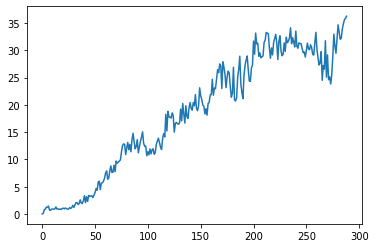

In [8]:

state = 'Train'
agent = Agent(env=env, random_seed=18)
if state == 'Train':
    scores = agent.train(n_episodes=3000, max_t=3000)
    plt.plot(scores)
else: # Test     
    agent.actor_local.load_state_dict(torch.load('../saved_model/saved_TD3_actor.pth'))
    agent.critic_local_1.load_state_dict(torch.load('../saved_model/saved_TD3_critic_1.pth'))
    agent.critic_local_2.load_state_dict(torch.load('../saved_model/saved_TD3_critic_2.pth'))


    score_test = []                                  
    for test_episode in range(1, 100+1):
        train_mode = True if mode == 'fast' else False
        env_info = agent.env.reset(train_mode=train_mode)[agent.brain_name]      # reset the environment
        state = env_info.vector_observations                         # get the current state
        score_temp = 0.                                              # initialize the score
        while True:
            action = agent.act(state, add_noise=False)               # select an action
            env_info = env.step(action)[agent.brain_name]            # send the action to the environment
            next_state = env_info.vector_observations                # get the next state
            reward = env_info.rewards                                # get the reward
            done = env_info.local_done                               # see if episode has finished
            score_temp += np.mean(reward)                            # update the score
            state = next_state                                       # roll over the state to next time step
            if any(done):                                            # exit loop if episode finished
                score_test.append(score_temp)
                print('\rEpisode {}\tAverage Score: {:.2f}'.format(test_episode, np.mean(score_test)), end="")
                score_temp = 0.
                break
        
    print("\nFinal Score: {}".format(np.mean(score_test)))
    agent.env.close()

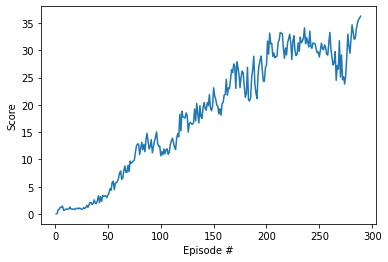

In [9]:

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()